In [ ]:
import numpy as np

In [ ]:
input = """(1, 1, 1), (1, 2, 1), (1, 3, 1), (2, 1, 1), (2, 2, 1), (2, 3, 1), (2, 3.5, 1), (2.5, 2, 1), (3.5, 1, 1), (3.5, 2, 1), (3.5, 3, 2), (3.5, 4, 2), (4.5, 1, 2), (4.5, 2, 2), (4.5, 3, 2), (5, 4, 2), (5, 5, 2), (6, 3, 2), (6, 4, 2), (6, 5, 2)"""
arr = input[1:-1].split("), (")
D = 3
N = len(arr)
X = np.zeros((D, N))
count = 0
for i in arr:
  ip = i.split(', ')
  X[:,count] = np.array([float(ip[0]),float(ip[1]),float(ip[2])])
  count += 1

print(X)

[[1.  1.  1.  2.  2.  2.  2.  2.5 3.5 3.5 3.5 3.5 4.5 4.5 4.5 5.  5.  6.
  6.  6. ]
 [1.  2.  3.  1.  2.  3.  3.5 2.  1.  2.  3.  4.  1.  2.  3.  4.  5.  3.
  4.  5. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2. ]]


class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1) 
pca.fit(X.T)

PCA(n_components=1)

In [ ]:
e = pca.components_.T
print(e)

[[0.84538719]
 [0.48227763]
 [0.22962751]]


In [ ]:
D,K = e.shape

In [ ]:
before = np.zeros((D, N))
after = np.zeros((K,N))
cnt = 0
for i in range(N):
  x = X[:,i].reshape(D,1) - pca.mean_.reshape(D,1)
  #y là giá trị các mẫu sau khi chuyển đổi hệ cơ sở
  y = e.T.dot(x)
  after[:,cnt] = y.reshape(1,K)
  #Chuyển lại về hệ cơ sở cũ để kiểm tra
  x = e.dot(y) + pca.mean_.reshape(D,1)
  before[:,cnt] = x.reshape(1,D)
  cnt += 1
print('after')
print(after)
print('before')
print(before)

after
[[-3.01794127 -2.53566365 -2.05338602 -2.17255408 -1.69027646 -1.20799883
  -0.96686002 -1.26758286 -0.9044733  -0.42219567  0.28970946  0.77198709
   0.1705414   0.65281902  1.13509665  2.04006787  2.5223455   2.40317743
   2.88545506  3.36773268]]
before
[[0.89867111 1.30638244 1.71409377 1.61335061 2.02106194 2.42877326
  2.63262893 2.37840169 2.68536986 3.09308119 3.69491667 4.10262799
  3.59417351 4.00188484 4.40959617 5.17464724 5.58235857 5.48161541
  5.88932674 6.29703807]
 [1.26951445 1.50210616 1.73469787 1.67722577 1.90981748 2.14240919
  2.25870505 2.11367315 2.28879276 2.52138447 2.86472039 3.0973121
  2.8072483  3.03984001 3.27243172 3.70887909 3.9414708  3.88399871
  4.11659042 4.34918212]
 [0.80699766 0.91774187 1.02848608 1.00112182 1.11186603 1.22261024
  1.27798234 1.2089281  1.29230805 1.40305226 1.56652526 1.67726947
  1.539161   1.64990521 1.76064942 1.9684557  2.07919991 2.05183565
  2.16257986 2.27332407]]


In [ ]:
after_pca = pca.transform(X.T)
print(after_pca.T)

[[-3.01794127 -2.53566365 -2.05338602 -2.17255408 -1.69027646 -1.20799883
  -0.96686002 -1.26758286 -0.9044733  -0.42219567  0.28970946  0.77198709
   0.1705414   0.65281902  1.13509665  2.04006787  2.5223455   2.40317743
   2.88545506  3.36773268]]


In [ ]:
inverse = pca.inverse_transform(after.T)
print(inverse.T)

[[0.89867111 1.30638244 1.71409377 1.61335061 2.02106194 2.42877326
  2.63262893 2.37840169 2.68536986 3.09308119 3.69491667 4.10262799
  3.59417351 4.00188484 4.40959617 5.17464724 5.58235857 5.48161541
  5.88932674 6.29703807]
 [1.26951445 1.50210616 1.73469787 1.67722577 1.90981748 2.14240919
  2.25870505 2.11367315 2.28879276 2.52138447 2.86472039 3.0973121
  2.8072483  3.03984001 3.27243172 3.70887909 3.9414708  3.88399871
  4.11659042 4.34918212]
 [0.80699766 0.91774187 1.02848608 1.00112182 1.11186603 1.22261024
  1.27798234 1.2089281  1.29230805 1.40305226 1.56652526 1.67726947
  1.539161   1.64990521 1.76064942 1.9684557  2.07919991 2.05183565
  2.16257986 2.27332407]]


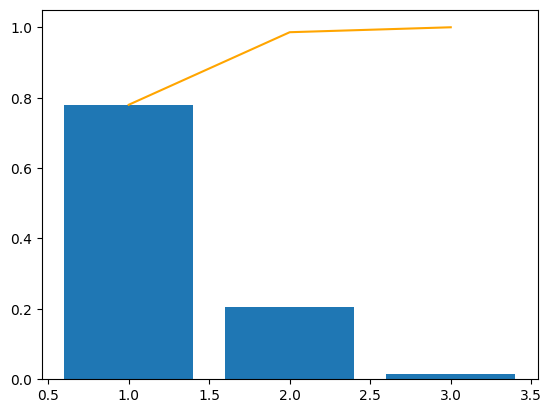

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(1, D+1)
y = pca.explained_variance_ratio_
sum = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2]
_y = [pca.explained_variance_ratio_[0]/sum,(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])/sum,1]
plt.plot(x,_y,color = 'orange')
plt.bar(x, y)
plt.show()

In [ ]:
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[[ 0.84538719  0.48227763  0.22962751]
 [ 0.48186085 -0.87406776  0.06177108]
 [-0.23050081 -0.05842803  0.9713164 ]]
[3.7220307  0.98406629 0.06692932]
[0.77980519 0.2061724  0.01402241]
[8.40943419 4.32403279 1.12767776]
